## Importing the initially required libraries

In [2]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
from warnings import filterwarnings
filterwarnings ('ignore')          #ignore any future warnings

## Loading the dataset

In [3]:
df =  pd.read_csv('C:/Users/Manoj/Desktop/Surya/Machine Learning/Class project/Classification_banking/banking.csv')

In [3]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44,blue-collar,married,basic.4y,unknown,yes,no,cellular,aug,thu,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0
1,53,technician,married,unknown,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,0
2,28,management,single,university.degree,no,yes,no,cellular,jun,thu,...,3,6,2,success,-1.7,94.055,-39.8,0.729,4991.6,1
3,39,services,married,high.school,no,no,no,cellular,apr,fri,...,2,999,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,0
4,55,retired,married,basic.4y,no,yes,no,cellular,aug,fri,...,1,3,1,success,-2.9,92.201,-31.4,0.869,5076.2,1


## Exploratory Data Analysis

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp_var_rate    41188 non-null  float64
 16  cons_price_idx  41188 non-null  float64
 17  cons_conf_idx   41188 non-null 

In [5]:
df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp_var_rate      0
cons_price_idx    0
cons_conf_idx     0
euribor3m         0
nr_employed       0
y                 0
dtype: int64

There are no Null Values in our Data

In [6]:
df.describe()

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911,0.112654
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528,0.316173
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000,0.000000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000,0.000000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000,0.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000,0.000000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000,1.000000


In [7]:
df['job'].value_counts()

admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: job, dtype: int64

In [8]:
df['marital'].value_counts()

married     24928
single      11568
divorced     4612
unknown        80
Name: marital, dtype: int64

In [9]:
df['education'].value_counts()

university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
unknown                 1731
illiterate                18
Name: education, dtype: int64

In [10]:
df['education'] = np.where(df['education']=='basic.9y','basic',df['education'])
df['education'] = np.where(df['education']=='basic.4y','basic',df['education'])
df['education'] = np.where(df['education']=='basic.6y','basic',df['education'])

In [11]:
# Combining all education categories having basic into one

In [12]:
df['education'].value_counts()

basic                  12513
university.degree      12168
high.school             9515
professional.course     5243
unknown                 1731
illiterate                18
Name: education, dtype: int64

In [13]:
df['y'].value_counts()

0    36548
1     4640
Name: y, dtype: int64

Our target variable is imbalanced. We will have to balance it using SMOTE later.

## Visualisation

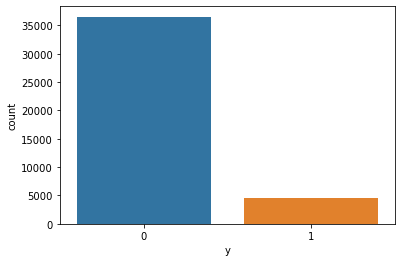

In [14]:
%matplotlib inline
sns.countplot(x='y',data=df)
plt.show()

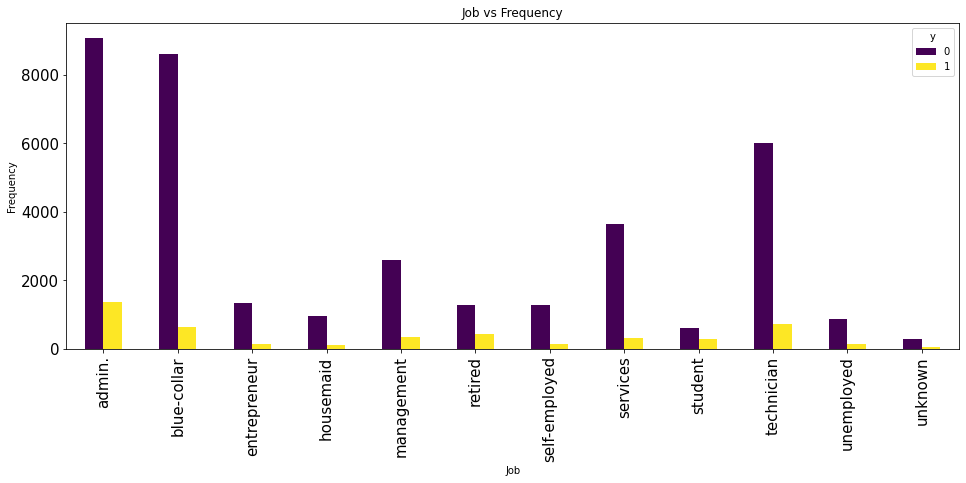

In [15]:
pd.crosstab(df.job,df.y).plot(kind= 'bar',colormap = 'viridis',figsize=(16,6),fontsize=15)
plt.xlabel('Job')
plt.ylabel('Frequency')
plt.title('Job vs Frequency')
plt.show()

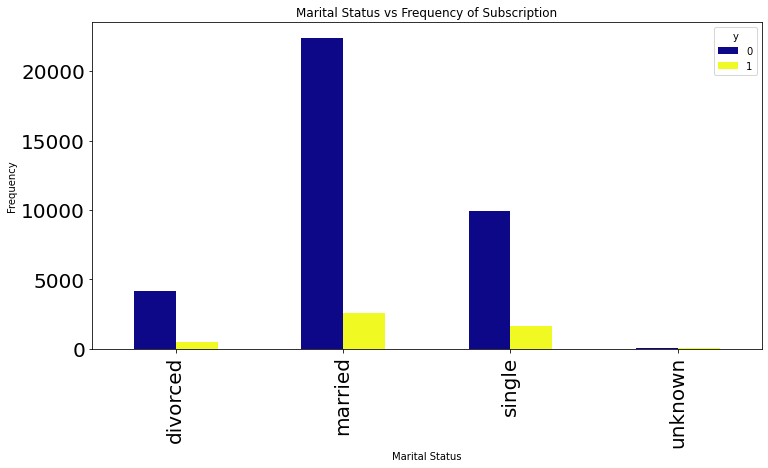

In [16]:
pd.crosstab(df.marital,df.y).plot(kind = 'bar',colormap = 'plasma', figsize=(12,6),fontsize=20)
plt.xlabel('Marital Status')
plt.ylabel('Frequency')
plt.title("Marital Status vs Frequency of Subscription")
plt.show()

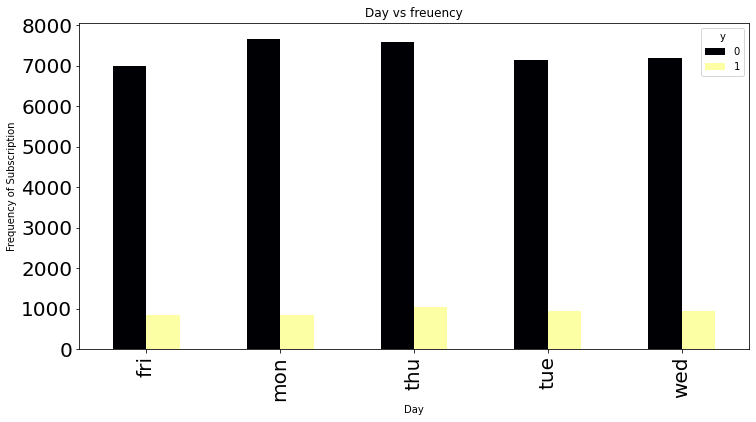

In [17]:
pd.crosstab(df.day_of_week,df.y).plot(kind = 'bar',colormap = 'inferno', figsize=(12,6),fontsize=20)
plt.xlabel('Day')
plt.ylabel('Frequency of Subscription')
plt.title("Day vs freuency")
plt.show()

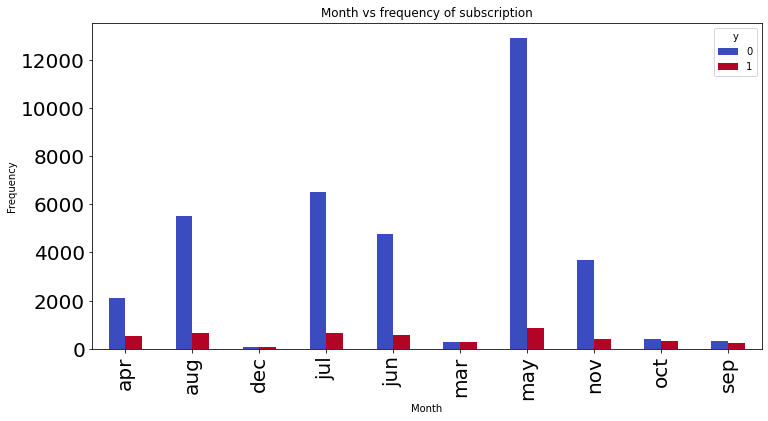

In [18]:
pd.crosstab(df.month,df.y).plot(kind = 'bar',colormap = 'coolwarm', figsize=(12,6),fontsize=20)
plt.xlabel('Month')
plt.ylabel('Frequency')
plt.title("Month vs frequency of subscription")
plt.show()

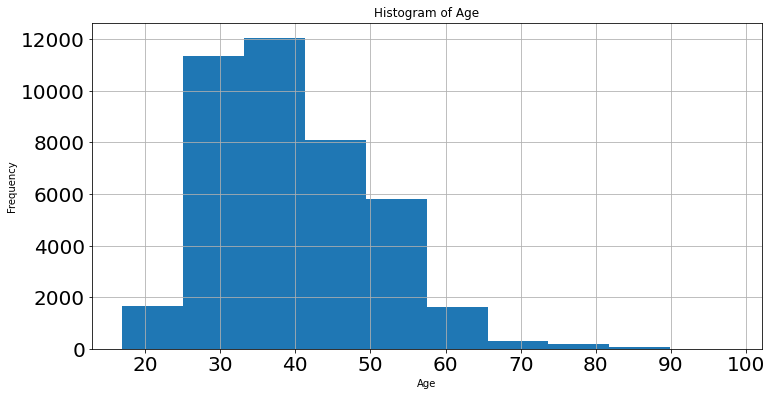

In [19]:
df.age.hist(figsize = (12,6), xlabelsize = 20, ylabelsize = 20)
plt.title('Histogram of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

In [20]:
df_num = df.select_dtypes(['int64','float64'])  #Selecting all numeric columns
df_num.head()

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44,210,1,999,0,1.4,93.444,-36.1,4.963,5228.1,0
1,53,138,1,999,0,-0.1,93.200,-42.0,4.021,5195.8,0
2,28,339,3,6,2,-1.7,94.055,-39.8,0.729,4991.6,1
3,39,185,2,999,0,-1.8,93.075,-47.1,1.405,5099.1,0
4,55,137,1,3,1,-2.9,92.201,-31.4,0.869,5076.2,1


age


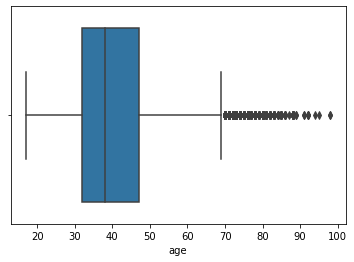

duration


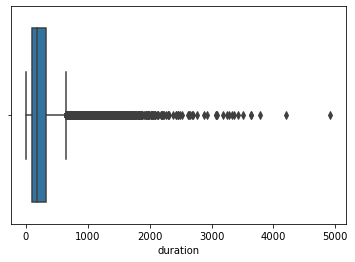

campaign


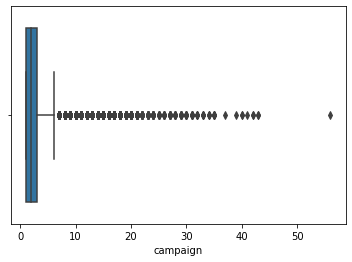

pdays


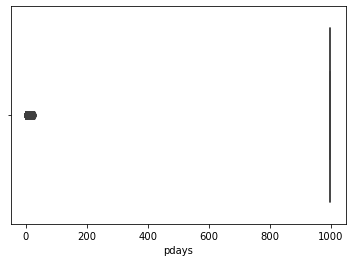

previous


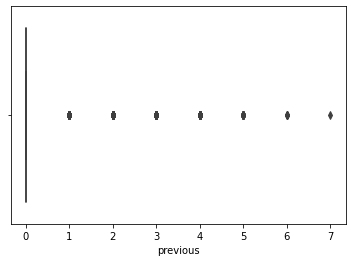

emp_var_rate


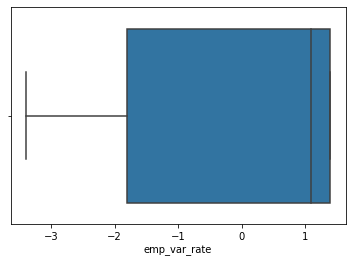

cons_price_idx


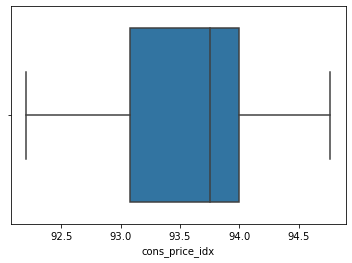

cons_conf_idx


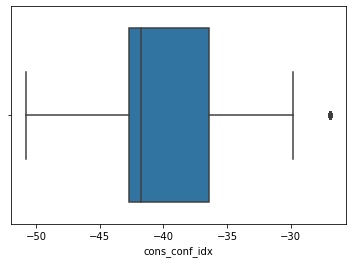

euribor3m


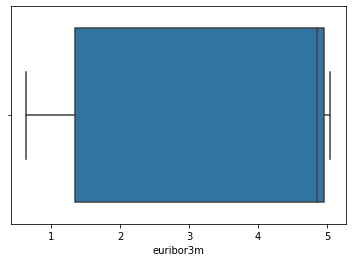

nr_employed


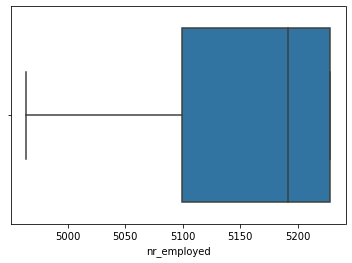

y


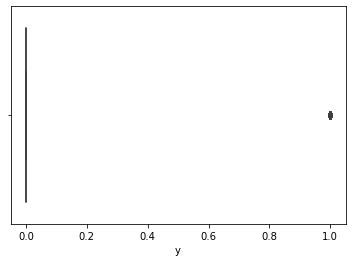

In [21]:
for i in df_num.columns:
    print(i)
    sns.boxplot(df_num[i])
    plt.show()

Itseems like there are more outliers in age,duration and campaign


### Using log func to check whether it can remove outliers

age


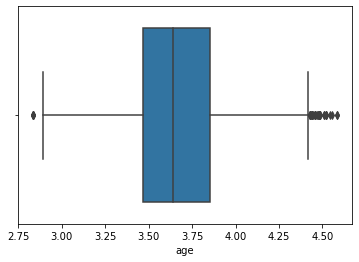

duration


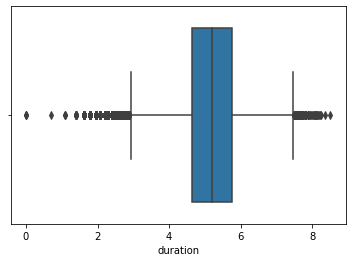

campaign


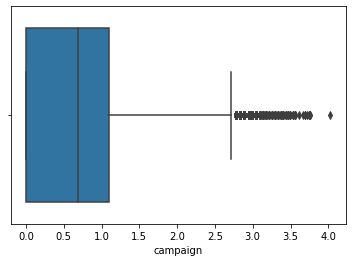

pdays


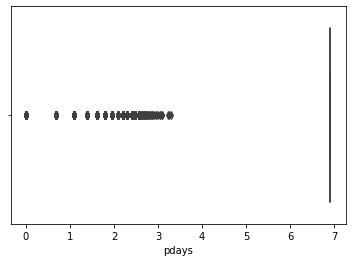

previous


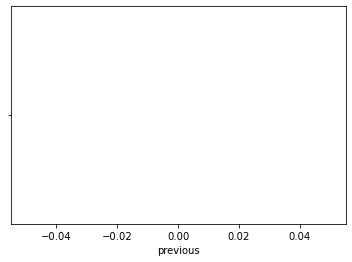

emp_var_rate


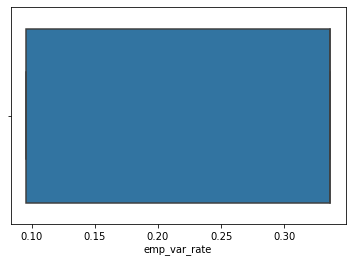

cons_price_idx


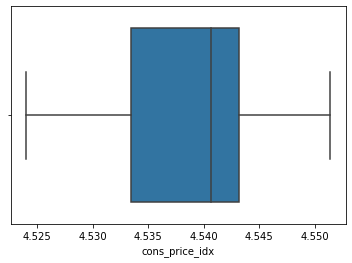

cons_conf_idx


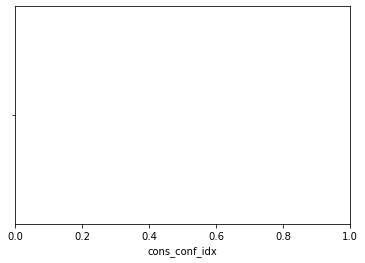

euribor3m


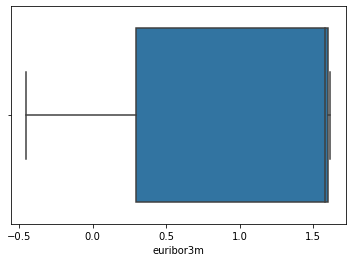

nr_employed


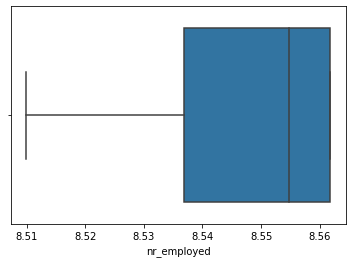

y


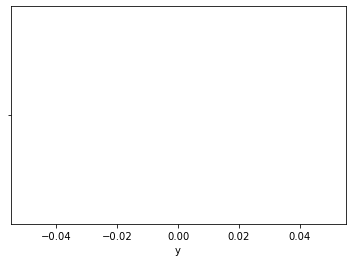

In [22]:
for i in df_num.columns:
    print(i)
    sns.boxplot(np.log(df_num[i]))
    plt.show()


Log Func doesn't remove the outliers

In [23]:
l=[0,10,11]
def Outlier(df):
    for column in df.iloc[:,l].columns:
        if df[column].dtype!='str':
            Q1=df[column].quantile(0.25)
            Q3=df[column].quantile(0.75)
            IQR= Q3-Q1
            lower=Q1-(1.5* IQR)
            upper=Q3+(1.5* IQR)
            df.loc[:,column] =np.where(df[column].values>upper,upper,df[column].values)
            df.loc[:,column] =np.where(df[column].values<lower,lower,df[column].values)
    return df
 
df2=Outlier(df)
print(df2.columns)
print(df2.head())

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp_var_rate', 'cons_price_idx',
       'cons_conf_idx', 'euribor3m', 'nr_employed', 'y'],
      dtype='object')
    age          job  marital          education  default housing loan  \
0  44.0  blue-collar  married              basic  unknown     yes   no   
1  53.0   technician  married            unknown       no      no   no   
2  28.0   management   single  university.degree       no     yes   no   
3  39.0     services  married        high.school       no      no   no   
4  55.0      retired  married              basic       no     yes   no   

    contact month day_of_week  ...  campaign  pdays  previous     poutcome  \
0  cellular   aug         thu  ...       1.0    999         0  nonexistent   
1  cellular   nov         fri  ...       1.0    999         0  nonexistent   
2  cellular   jun         

age


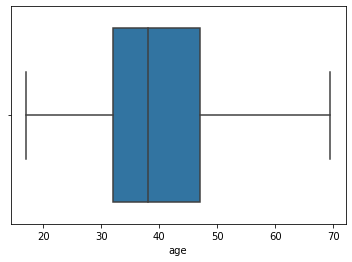

duration


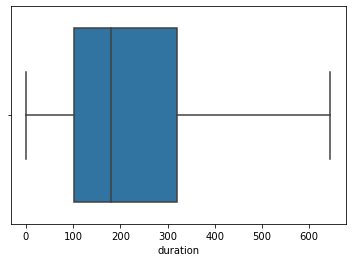

campaign


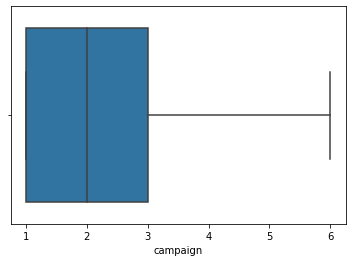

pdays


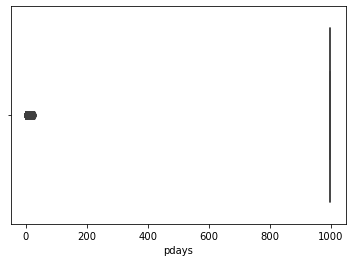

previous


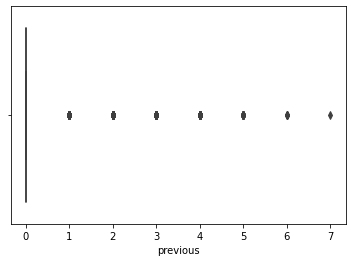

emp_var_rate


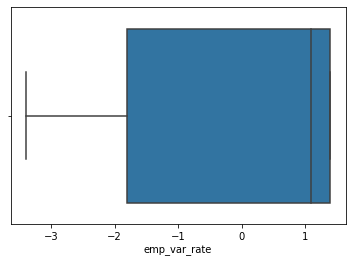

cons_price_idx


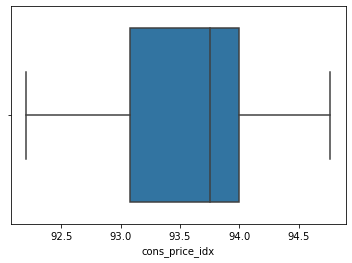

cons_conf_idx


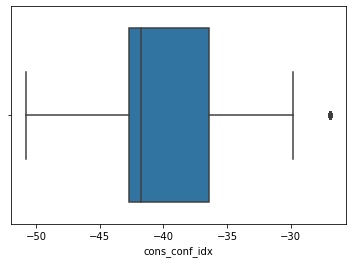

euribor3m


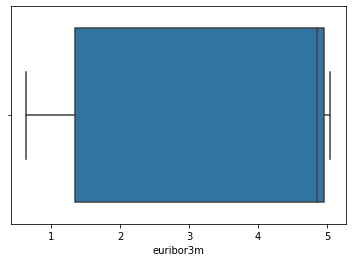

nr_employed


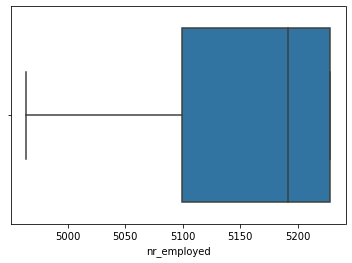

y


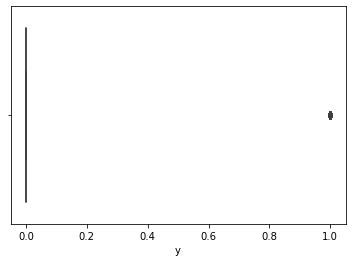

In [24]:
for i in df_num.columns:
    print(i)
    sns.boxplot(df2[i])
    plt.show()

Outliers are removed

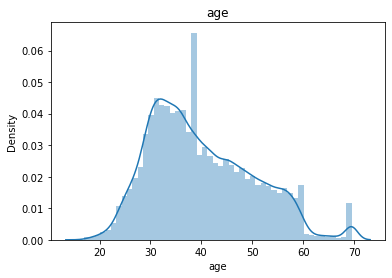

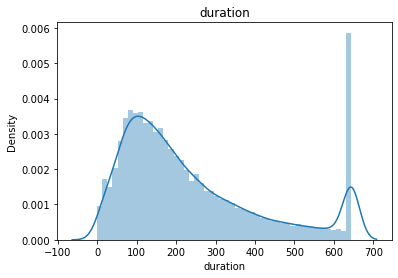

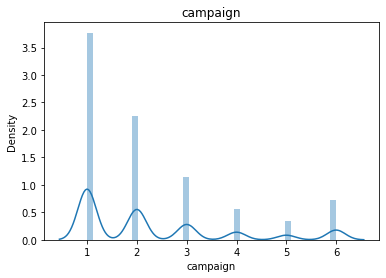

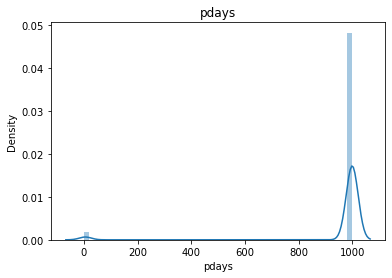

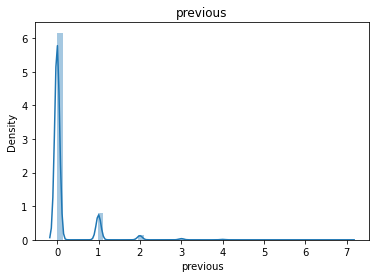

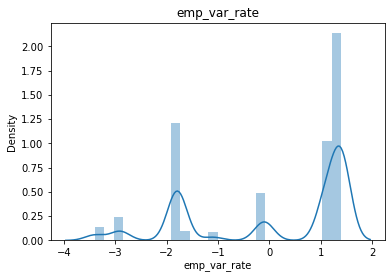

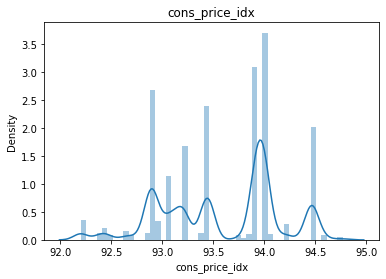

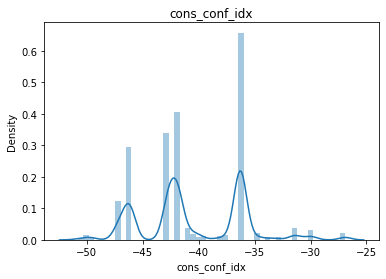

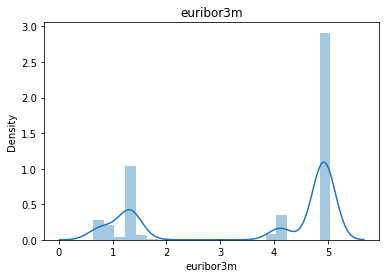

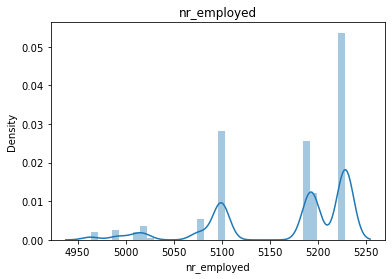

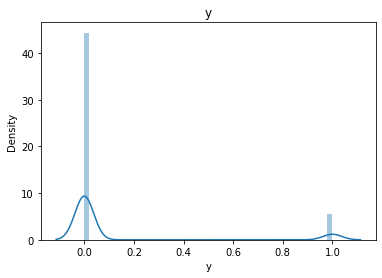

In [25]:
for i in df_num.columns:
    sns.distplot(df2[i])
    plt.title(i)
    plt.show()

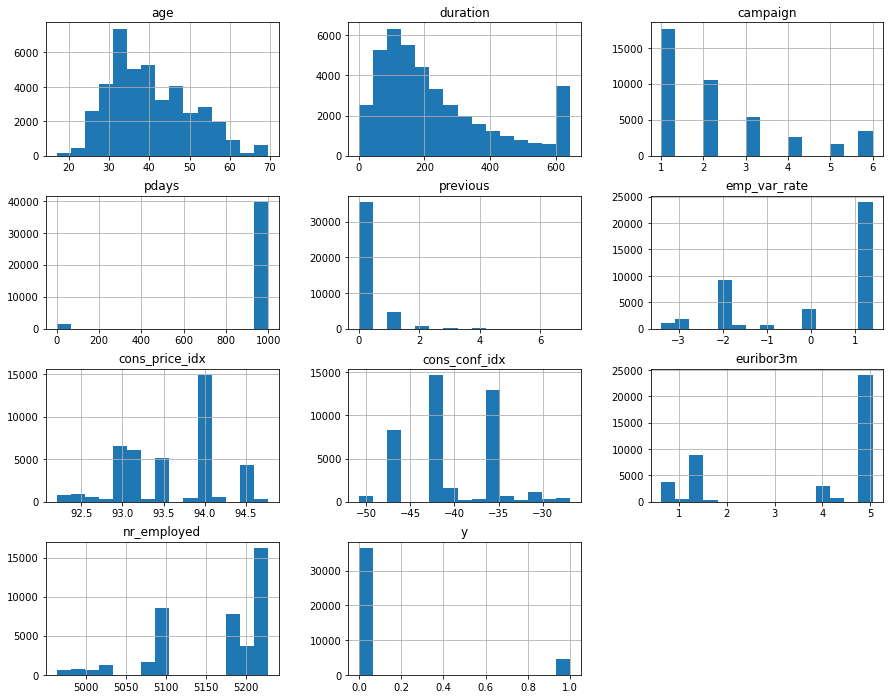

In [26]:
df.hist(figsize=(15,12),bins = 15)
plt.title("Features Distribution")
plt.show()

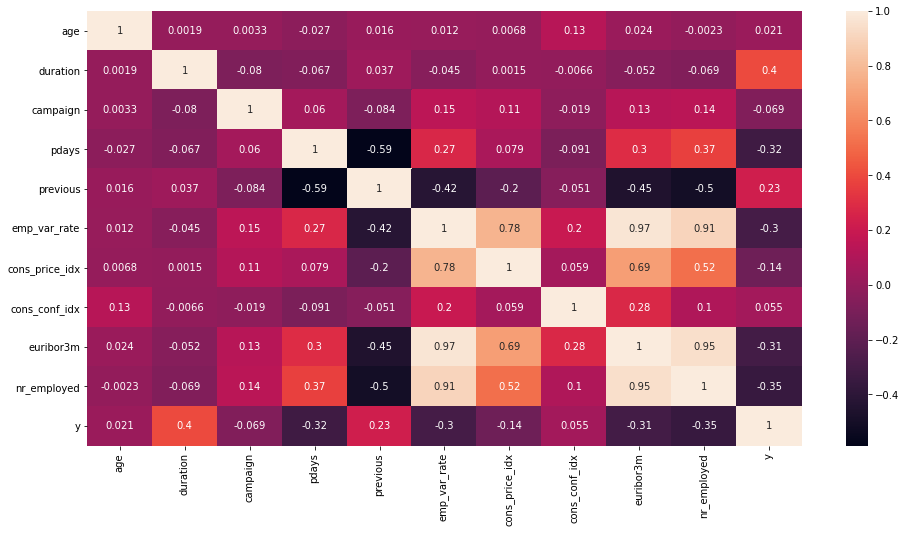

In [27]:
plt.figure(figsize=(16,8))
sns.heatmap(df2.corr(),annot = True)
plt.show()

In [28]:
df.describe(include = 'O')

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome
count,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188
unique,12,4,6,3,3,3,2,10,5,3
top,admin.,married,basic,no,yes,no,cellular,may,thu,nonexistent
freq,10422,24928,12513,32588,21576,33950,26144,13769,8623,35563


In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,41188.0,40.024060,10.421250,17.000,32.000,38.000,47.000,98.000
duration,41188.0,258.285010,259.279249,0.000,102.000,180.000,319.000,4918.000
campaign,41188.0,2.567593,2.770014,1.000,1.000,2.000,3.000,56.000
pdays,41188.0,962.475454,186.910907,0.000,999.000,999.000,999.000,999.000
previous,41188.0,0.172963,0.494901,0.000,0.000,0.000,0.000,7.000
emp_var_rate,41188.0,0.081886,1.570960,-3.400,-1.800,1.100,1.400,1.400
cons_price_idx,41188.0,93.575664,0.578840,92.201,93.075,93.749,93.994,94.767
cons_conf_idx,41188.0,-40.502600,4.628198,-50.800,-42.700,-41.800,-36.400,-26.900
euribor3m,41188.0,3.621291,1.734447,0.634,1.344,4.857,4.961,5.045
nr_employed,41188.0,5167.035911,72.251528,4963.600,5099.100,5191.000,5228.100,5228.100


## We will try to build a model with existing data and check for accuracy

In [30]:
df2.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp_var_rate', 'cons_price_idx',
       'cons_conf_idx', 'euribor3m', 'nr_employed', 'y'],
      dtype='object')

In [31]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  float64
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  float64
 11  campaign        41188 non-null  float64
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp_var_rate    41188 non-null  float64
 16  cons_price_idx  41188 non-null  float64
 17  cons_conf_idx   41188 non-null 

In [32]:
df_d= pd.get_dummies(data = df2, columns = ['job', 'marital', 'education', 'default', 'housing', 'loan','poutcome'])
df_d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 48 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   age                            41188 non-null  float64
 1   contact                        41188 non-null  object 
 2   month                          41188 non-null  object 
 3   day_of_week                    41188 non-null  object 
 4   duration                       41188 non-null  float64
 5   campaign                       41188 non-null  float64
 6   pdays                          41188 non-null  int64  
 7   previous                       41188 non-null  int64  
 8   emp_var_rate                   41188 non-null  float64
 9   cons_price_idx                 41188 non-null  float64
 10  cons_conf_idx                  41188 non-null  float64
 11  euribor3m                      41188 non-null  float64
 12  nr_employed                    41188 non-null 

In [33]:
df_d.head()

,age,contact,month,day_of_week,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,...,default_yes,housing_no,housing_unknown,housing_yes,loan_no,loan_unknown,loan_yes,poutcome_failure,poutcome_nonexistent,poutcome_success
0,44.0,cellular,aug,thu,210.0,1.0,999,0,1.4,93.444,...,0,0,0,1,1,0,0,0,1,0
1,53.0,cellular,nov,fri,138.0,1.0,999,0,-0.1,93.200,...,0,1,0,0,1,0,0,0,1,0
2,28.0,cellular,jun,thu,339.0,3.0,6,2,-1.7,94.055,...,0,0,0,1,1,0,0,0,0,1
3,39.0,cellular,apr,fri,185.0,2.0,999,0,-1.8,93.075,...,0,1,0,0,1,0,0,0,1,0
4,55.0,cellular,aug,fri,137.0,1.0,3,1,-2.9,92.201,...,0,0,0,1,1,0,0,0,0,1


In [34]:
df_d.columns

Index(['age', 'contact', 'month', 'day_of_week', 'duration', 'campaign',
       'pdays', 'previous', 'emp_var_rate', 'cons_price_idx', 'cons_conf_idx',
       'euribor3m', 'nr_employed', 'y', 'job_admin.', 'job_blue-collar',
       'job_entrepreneur', 'job_housemaid', 'job_management', 'job_retired',
       'job_self-employed', 'job_services', 'job_student', 'job_technician',
       'job_unemployed', 'job_unknown', 'marital_divorced', 'marital_married',
       'marital_single', 'marital_unknown', 'education_basic',
       'education_high.school', 'education_illiterate',
       'education_professional.course', 'education_university.degree',
       'education_unknown', 'default_no', 'default_unknown', 'default_yes',
       'housing_no', 'housing_unknown', 'housing_yes', 'loan_no',
       'loan_unknown', 'loan_yes', 'poutcome_failure', 'poutcome_nonexistent',
       'poutcome_success'],
      dtype='object')

In [35]:
X = df_d.drop(['y','contact', 'month', 'day_of_week'] , axis = 1)
y = df_d['y']

In [36]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=40)

In [45]:
from sklearn import svm, tree, linear_model, neighbors, naive_bayes, ensemble, discriminant_analysis, gaussian_process
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix,plot_confusion_matrix,plot_roc_curve

MLA = [                                                #Creating a list of All Classification Algorithms
       linear_model.LogisticRegression(),
       ensemble.AdaBoostClassifier(),
       ensemble.BaggingClassifier(),
       ensemble.GradientBoostingClassifier(),
       ensemble.RandomForestClassifier(), 
       linear_model.SGDClassifier(),
       XGBClassifier(),
       naive_bayes.GaussianNB(),
       neighbors.KNeighborsClassifier(),
       tree.DecisionTreeClassifier(),
       tree.ExtraTreeClassifier(),
       svm.SVC()
    
    
]

In [38]:
name = []
testscore = []
trainscore = []
for alg in MLA:
    name.append(alg.__class__.__name__)
    alg.fit(X_train, y_train)
    test_pred = alg.predict(X_test)
    testscore.append(accuracy_score(y_test, test_pred))
    train_pred = alg.predict(X_train)
    trainscore.append(accuracy_score(y_train, train_pred))


[11:41:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [39]:
comparison_1 = pd.DataFrame({"name": name, "test score": testscore, 'train score': trainscore })
comparison_1

,name,test score,train score
0,LogisticRegression,0.908068,0.906351
1,AdaBoostClassifier,0.910172,0.908987
2,BaggingClassifier,0.909282,0.993063
3,GradientBoostingClassifier,0.914300,0.917623
4,RandomForestClassifier,0.910577,0.999861
5,SGDClassifier,0.897953,0.898165
6,XGBClassifier,0.913248,0.960043
7,GaussianNB,0.840495,0.839409
8,KNeighborsClassifier,0.906773,0.930075
9,DecisionTreeClassifier,0.888808,0.999861


## We will scale the data and check accuracy

MinMaxScaler may be used when the upper and lower boundaries are well known from domain knowledge

In [40]:
from sklearn.preprocessing import MinMaxScaler

mc = MinMaxScaler()

X_train_mc = mc.fit_transform(X_train)

X_test_mc = mc.transform(X_test)

In [41]:
name = []
testscore = []
trainscore = []
for alg in MLA:
    name.append(alg.__class__.__name__)
    alg.fit(X_train_mc, y_train)
    test_pred = alg.predict(X_test_mc)
    testscore.append(accuracy_score(y_test,test_pred))
    train_pred = alg.predict(X_train_mc)
    trainscore.append(accuracy_score(y_train, train_pred))

comparison_2 = pd.DataFrame({"name": name, "testscore": testscore, 'trainscore': trainscore })
comparison_2

[11:43:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


,name,testscore,trainscore
0,LogisticRegression,0.910091,0.907495
1,AdaBoostClassifier,0.910172,0.908987
2,BaggingClassifier,0.906935,0.992508
3,GradientBoostingClassifier,0.914300,0.917623
4,RandomForestClassifier,0.911953,0.999827
5,SGDClassifier,0.908716,0.905969
6,XGBClassifier,0.913167,0.960043
7,GaussianNB,0.743870,0.746176
8,KNeighborsClassifier,0.896739,0.919150
9,DecisionTreeClassifier,0.887756,0.999861


In [42]:
y_train.value_counts()

0    25577
1     3254
Name: y, dtype: int64

## Since target variable is imbalanced, we apply SMOTE to balance them

In [48]:
from imblearn.over_sampling import SMOTE            #We use SMOTE for imbalanced classification
from collections import Counter
counter = Counter(y_train)
print('Before Smote:', counter)
smt = SMOTE(random_state=0)
X_train_sm, y_train_sm = smt.fit_resample(X_train, y_train)
counter1 = Counter(y_train_sm)
print('After Smote:',counter1)

Before Smote: Counter({0: 25577, 1: 3254})
After Smote: Counter({0: 25577, 1: 25577})


In [46]:
name = []
testscore = []
trainscore = []
for alg in MLA:
    name.append(alg.__class__.__name__)
    alg.fit(X_train_sm, y_train_sm)
    test_pred = alg.predict(X_test)
    testscore.append(accuracy_score(y_test,test_pred))
    train_pred = alg.predict(X_train_sm)
    trainscore.append(accuracy_score(y_train_sm, train_pred))
    print(classification_report(y_test,test_pred))   
    print(alg.__class__.__name__)
    print(confusion_matrix(y_test,test_pred))

              precision    recall  f1-score   support

           0       0.96      0.90      0.93     10971
           1       0.48      0.71      0.58      1386

    accuracy                           0.88     12357
   macro avg       0.72      0.81      0.75     12357
weighted avg       0.91      0.88      0.89     12357

LogisticRegression
[[9906 1065]
 [ 396  990]]
              precision    recall  f1-score   support

           0       0.95      0.94      0.95     10971
           1       0.56      0.58      0.57      1386

    accuracy                           0.90     12357
   macro avg       0.76      0.76      0.76     12357
weighted avg       0.90      0.90      0.90     12357

AdaBoostClassifier
[[10345   626]
 [  578   808]]
              precision    recall  f1-score   support

           0       0.94      0.95      0.95     10971
           1       0.59      0.51      0.54      1386

    accuracy                           0.90     12357
   macro avg       0.76      0.7

In [47]:
comparison_3 = pd.DataFrame({"name": name, "test score": testscore, 'train score': trainscore })
comparison_3

,name,test score,train score
0,LogisticRegression,0.881767,0.905462
1,AdaBoostClassifier,0.902565,0.936623
2,BaggingClassifier,0.904508,0.997048
3,GradientBoostingClassifier,0.903698,0.943328
4,RandomForestClassifier,0.908797,0.999922
5,SGDClassifier,0.892531,0.812625
6,XGBClassifier,0.910253,0.975584
7,GaussianNB,0.728170,0.819154
8,KNeighborsClassifier,0.847131,0.936799
9,DecisionTreeClassifier,0.885733,0.999922
